<span style="text-align: center; font-size: 2.5rem; display: block;">FGV - Métodos Matriciais e Análises de Clusters</span>
<span style="text-align:center; display: block; font-size: 2rem">MBA Executivo em Business Analytics e Big Data</span>

<span style="font-size: 1.5rem; display: block">Professora</span>
<span style="font-size: 1.2rem; color: #343434">Laura de Oliveira F. Moraes</span>

# Membros
- Igor Freitas
- Leonardo Nascimento

# <span>Tabela de Conteúdos</span>

- <a href="#1" style="color: #343434">1. Preparação dos dados</a>
    - <a href="#11" style="color: #343434">1.1. Bibliotecas</a>
    - <a href="#12" style="color: #343434">1.2. Carregamento dos dados</a>
    - <a href="#13" style="color: #343434">1.3. Métodos</a>
- <a href="#2" style="color: #343434">2. Análise Exploratória dos Dados</a>
    - <a href="#21" style="color: #343434">2.1. Visualizando os tipos dos atributos</a>
    - <a href="#22" style="color: #343434">2.2. Valores faltantes</a>
    - <a href="#23" style="color: #343434">2.3. Selecionando atributos categóricos</a>
    - <a href="#24" style="color: #343434">2.4. Selecionando atributos numéricos</a>
- <a href="#3" style="color: #343434">3. Transformações</a>
    - <a href="#31" style="color: #343434">3.1. Label Encoder / Dummies</a>
    - <a href="#32" style="color: #343434">3.2. PCA</a>
    - <a href="#33" style="color: #343434">3.3. Salvando o dataframe</a>
- <a href="#4" style="color: #343434">4. Modelagem</a>
    - <a href="#41" style="color: #343434">4.1. K-Means</a>
- <a href="#5" style="color: #343434">5. Avaliação</a>

<span style="font-size: 1.5rem; display: block">Github:</span>
<a href="https://github.com/lsnascimento/ds-mmca" target="_blank">https://github.com/lsnascimento/ds-mmca</a>

# <a id="1">1. Preparação dos dados</a>

## <a id="11">1.1. Bibliotecas</a>

In [89]:
import pickle
import datetime as dt
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift

from scipy.spatial.distance import cdist, pdist

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import silhouette_score, silhouette_samples

warnings.filterwarnings('ignore')

## <a id="12">1.2. Carregamento dos dados</a>

In [5]:
# Dados categóricos
whisky = "https://www.dropbox.com/s/bf4sf8jdckcgwrz/scotch.csv?dl=1"
telco = "https://www.dropbox.com/s/kh59jmg9rvo5hpc/telco_treino.csv?dl=1"
abalone = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
sponge = "https://archive.ics.uci.edu/ml/machine-learning-databases/sponge/sponge.data"
housing = "https://www.dropbox.com/s/zdbdnnhui9tkj2q/housing_treino.csv?dl=1"

# Dados numéricos
wine = "https://www.dropbox.com/s/iya32vzp81jb8bv/wine_data.csv?dl=1"
movielens = "https://www.dropbox.com/s/ucwh8f86hk2hm6k/ml-1m.csv?dl=1"

In [18]:
df = pd.read_csv(sponge)

In [19]:
print(df.shape)

df.head(3)

(75, 46)


,AAPTOS_AAPTOS,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO.1,NO.2,3,NO.3,SIN_TILOSTILOS_ADICIONALES,...,MASIVO_IRREGULAR,0,NO.12,OTROS,RUGOSA,RADIAL,NO.13,NO.14,NO.15,DURO
0,ALECTONA_MILLARI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,0,NO,?,LISA,CONFUSA,NO,SI,NO,DURO
1,CLIONA_CARTERI,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,INCRUSTANTE,1,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO
2,CLIONA_CELATA,SIN_CORTEX,SIN_CAPA_INTERNA_DEL_CORTEX,NO,SIN_CORTEX,SIN_CORTEX,SIN_CORTEX,0,NO,SIN_TILOSTILOS_ADICIONALES,...,MASIVO_IRREGULAR,3,SI,OTROS,LISA,CONFUSA,NO,SI,NO,DURO


## <a id="13">1.3. Métodos</a>

In [98]:
import os

os.getcwd()

'/home/leonardo/Notebooks/mmac'

In [100]:
def save(obj, name):
    _name = '%s_%s' % (name, dt.datetime.now().strftime("%Y-%m-%d_%H-%M-%S"))
    _path = os.path.join(os.getcwd(), 'backup')
    
    try:
        with open('{}/{}'.format(_path, _name), 'wb') as _f:
            pickle.dump(obj, _f)
        
        print('Objeto {!r} salvo com sucesso'.format(_name))
    except:
        print('Erro ao tentar salvar o objeto {!r}'.format(_name))

In [22]:
def load(file):
    try:
        with open(file, 'rb') as _f:
            return pickle.load(_f)
    except:
        print('Falha ao tentar carregar o objeto {!r}'.format(file))

In [73]:
def pca_ratio_plot(data, n, perc=False):
    cols = []

    for i in np.arange(1, n + 1):
        cols.append(f'{i}')

    # Gráfico

    width = 0.8

    x = np.arange(data.shape[0])

    fig, ax = plt.subplots(figsize=(24, 12))

    p1 = ax.bar(x, data, width)
    p2 = ax.plot(x, data, ':r')

    ax.set_title('PCA Explained Variance Ratio (%)', fontsize=18)

    ax.set_xticks(x)
    ax.set_xticklabels(cols)
    
    ax.set_xlabel('Principal Components')
    ax.set_ylabel('Percentage')

    autolabel(p1, perc, ax)

    plt.show()

In [24]:
def autolabel(charts, perc=False, ax=None):
    for c in charts:
        height = c.get_height()
        val = '{:.2f}'.format(height) if not perc else '{:.2f}%'.format(height * 100)
        
        ax.annotate(
            val,
            xy=(c.get_x() + c.get_width() / 2, height),
            xytext=(0, 3),
            textcoords='offset points',
            ha='center',
            va='bottom'
        )

# <a id="2">2. Análise Exploratória dos Dados</a>

## <a id="21">2.1. Visualizando os tipos dos atributos</a>

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 46 columns):
AAPTOS_AAPTOS                        75 non-null object
1_CAPA                               75 non-null object
SIN_CAPA_INTERNA_DEL_CORTEX          75 non-null object
SI                                   75 non-null object
NO                                   75 non-null object
NO.1                                 75 non-null object
NO.2                                 75 non-null object
3                                    75 non-null int64
NO.3                                 75 non-null object
SIN_TILOSTILOS_ADICIONALES           75 non-null object
1_TIPO                               75 non-null object
NO.4                                 75 non-null object
NO.5                                 75 non-null object
NO.6                                 75 non-null object
NO.7                                 75 non-null object
SI.1                                 75 non-null object
NO

## <a id="22">2.2. Valores faltantes</a>

In [27]:
df.isnull().sum()

AAPTOS_AAPTOS                        0
1_CAPA                               0
SIN_CAPA_INTERNA_DEL_CORTEX          0
SI                                   0
NO                                   0
NO.1                                 0
NO.2                                 0
3                                    0
NO.3                                 0
SIN_TILOSTILOS_ADICIONALES           0
1_TIPO                               0
NO.4                                 0
NO.5                                 0
NO.6                                 0
NO.7                                 0
SI.1                                 0
NO.8                                 0
NO.9                                 0
SIN_ESPICULA_PRINCIPAL_ESTILO        0
SIN_ESPICULA_PRINCIPAL_TILOSTILO_    0
SIN_TILOSTILOS                       0
EMPALIZADA                           0
SUBESFERICA_ALARGADA_OVOIDE          0
RECTA_FUSIFORME                      0
ESTILO                               0
SIN_EXOSTILOS            

**Análise:**
- O dataset não possui nenhum valor faltante

## <a id="23">2.3. Selecionando atributos categóricos</a>

In [28]:
feat_cat = df.select_dtypes(include=np.object)

In [31]:
print('{} colunas de {} são categóricas'.format(len(feat_cat.columns), df.shape[1]))

43 colunas de 46 são categóricas


In [33]:
feat_cat.describe().T

,count,unique,top,freq
AAPTOS_AAPTOS,75,75,SPHAEROTYLUS_CAPITATUS,1
1_CAPA,75,4,SIN_CORTEX,33
SIN_CAPA_INTERNA_DEL_CORTEX,75,6,SIN_CAPA_INTERNA_DEL_CORTEX,45
SI,75,2,SI,42
NO,75,3,NO,37
NO.1,75,3,NO,41
NO.2,75,3,NO,41
NO.3,75,2,NO,73
SIN_TILOSTILOS_ADICIONALES,75,5,SIN_TILOSTILOS_ADICIONALES,43
1_TIPO,75,4,3_TIPOS,32


## <a id="24">2.4. Selecionando atributos numéricos</a>

In [35]:
feat_num = df.select_dtypes(exclude=np.object)

In [37]:
print('{} colunas de {} são numéricas'.format(len(feat_num.columns), df.shape[1]))

3 colunas de 46 são numéricas


In [38]:
feat_num.describe().T

,count,mean,std,min,25%,50%,75%,max
3,75.0,1.560000,1.535525,0.0,0.0,2.0,3.0,4.0
3.1,75.0,2.226667,0.894024,0.0,1.5,3.0,3.0,3.0
0,75.0,1.000000,1.230249,0.0,0.0,0.0,2.0,4.0


In [45]:
feat_num.head()

,3,3.1,0
0,0,1,0
1,0,1,1
2,0,1,3
3,0,0,0
4,0,0,1


In [46]:
feat_num.tail()

,3,3.1,0
70,4,3,2
71,3,3,2
72,3,2,0
73,3,1,2
74,2,1,2


**Análise:**
- Como os valores numéricos estão entre 0 e no máximo 4, não será a aplicado a normalização desses dados, pois eles encontram-se na mesma ordem de grandeza que os demais.

# <a id="3">3. Transformações</a>

## <a id="31">3.1. Label Encoder / Dummies</a>

In [57]:
for i in feat_cat.columns:
    if feat_cat[i].nunique() <= 10:
        _encoder = LabelEncoder()
        
        df[i] = _encoder.fit_transform(feat_cat[i])
    else:
        df[i] = pd.get_dummies(feat_cat[i])

**Análises:**
- Os atributos que possuem em sua coluna valores únicos menor ou igual à 10 será aplicado o LabelEncoder, que converte os dados categóricos de 0 à n.
- Já os atributos que possuem mais de 10 valores únicos em sua coluna, será aplicado o método get_dummies, onde converterá os dados categóricos em colunas e definirá os seus valores em 0 ou 1.

In [58]:
feat_cat.head()

,AAPTOS_AAPTOS,1_CAPA,SIN_CAPA_INTERNA_DEL_CORTEX,SI,NO,NO.1,NO.2,NO.3,SIN_TILOSTILOS_ADICIONALES,1_TIPO,...,SIN_ESFERASTER.1,MASIVO_IRREGULAR,NO.12,OTROS,RUGOSA,RADIAL,NO.13,NO.14,NO.15,DURO
0,1,3,3,0,2,2,2,0,4,0,...,2,4,0,0,4,1,0,1,0,2
1,0,3,3,0,2,2,2,0,4,0,...,2,4,1,3,4,1,0,1,0,2
2,0,3,3,0,2,2,2,0,4,1,...,2,5,1,3,4,1,0,1,0,2
3,0,3,3,0,2,2,2,0,4,0,...,2,4,0,3,4,1,0,1,0,2
4,0,3,3,0,2,2,2,0,4,0,...,2,4,1,3,4,1,0,1,0,2


## <a id="32">3.2. PCA</a>

In [67]:
df.shape

(75, 46)

In [66]:
n_comp = 46

_pca = PCA(n_components=n_comp)

df_pca = _pca.fit_transform(df)

In [75]:
for i in range(df_pca.shape[1]):
    print('{} - Proporção acumulada: {}'.format(i, np.sum(_pca.explained_variance_ratio_[:i])))

0 - Proporção acumulada: 0.0
1 - Proporção acumulada: 0.374800775256269
2 - Proporção acumulada: 0.49897267073968743
3 - Proporção acumulada: 0.5963741191141474
4 - Proporção acumulada: 0.6665127814471047
5 - Proporção acumulada: 0.7186417708055911
6 - Proporção acumulada: 0.7655875727116785
7 - Proporção acumulada: 0.8059608725399424
8 - Proporção acumulada: 0.8382876262900449
9 - Proporção acumulada: 0.8638157684686182
10 - Proporção acumulada: 0.8846120370102387
11 - Proporção acumulada: 0.9013648453049409
12 - Proporção acumulada: 0.9146291201616414
13 - Proporção acumulada: 0.9257377700311812
14 - Proporção acumulada: 0.9362527653305226
15 - Proporção acumulada: 0.944403100552049
16 - Proporção acumulada: 0.9520714275519663
17 - Proporção acumulada: 0.9592663529556081
18 - Proporção acumulada: 0.9661293619524514
19 - Proporção acumulada: 0.9713797302096436
20 - Proporção acumulada: 0.9763037140186651
21 - Proporção acumulada: 0.9800885788509345
22 - Proporção acumulada: 0.98286667

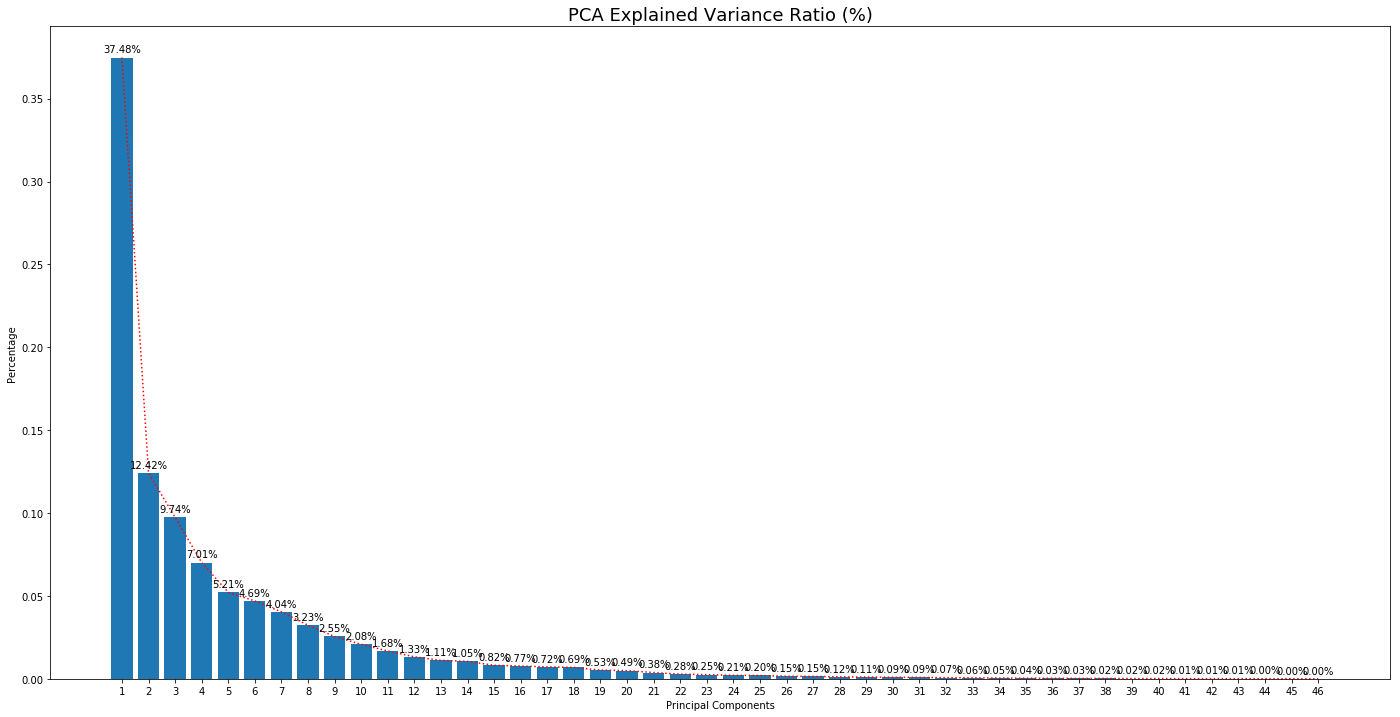

In [74]:
pca_ratio_plot(_pca.explained_variance_ratio_, n_comp, True)

**Análise:**
- Observando o gráfico acima, pode-se observar 2 pontos que podem ser considerados o joelhos para a escolha das PCA's. O primeiro deles está localizado no índice 14 e o segundo no 18.

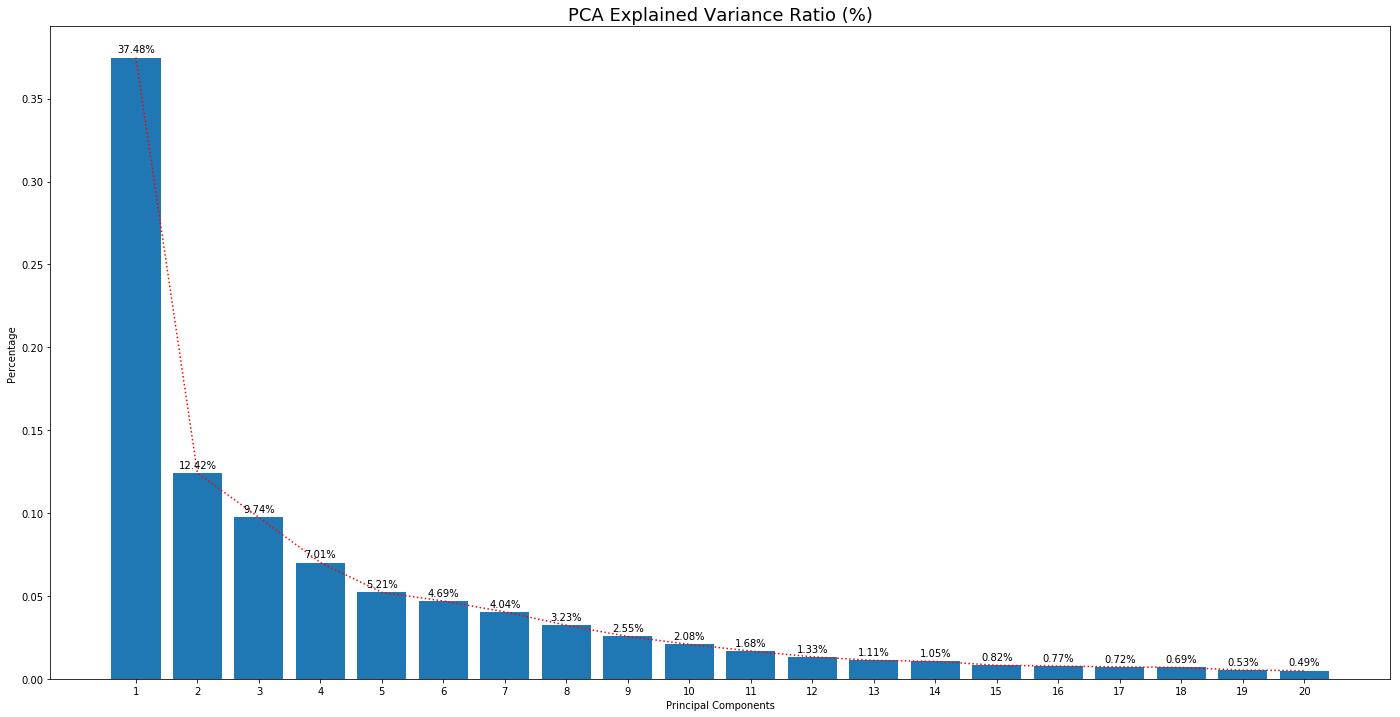

In [78]:
pca_ratio_plot(_pca.explained_variance_ratio_[: 20], n_comp, True)

**Análise:**
- Observando mais a fundo o gráfico acima, selecionaremos o 18 componentes principais, onde todas elas juntas representam 96% da variância dos dados.

In [79]:
df_reduced = df_pca[:, :18]

In [81]:
df_reduced.shape

(75, 18)

## <a id="33">3.3. Salvando o dataframe</a>

In [101]:
save(df, 'df')
save(df_pca, 'df_pca')
save(df_reduced, 'df_reduzido')

Objeto 'df_2019-09-21_23-38-11' salvo com sucesso
Objeto 'df_pca_2019-09-21_23-38-11' salvo com sucesso
Objeto 'df_reduzido_2019-09-21_23-38-11' salvo com sucesso


# <a id="4">4. Modelagem</a>

## <a id="41">4.1. K-means</a>

Text(0.5, 1.0, 'Soma da distância ao centróide x Valor de K')

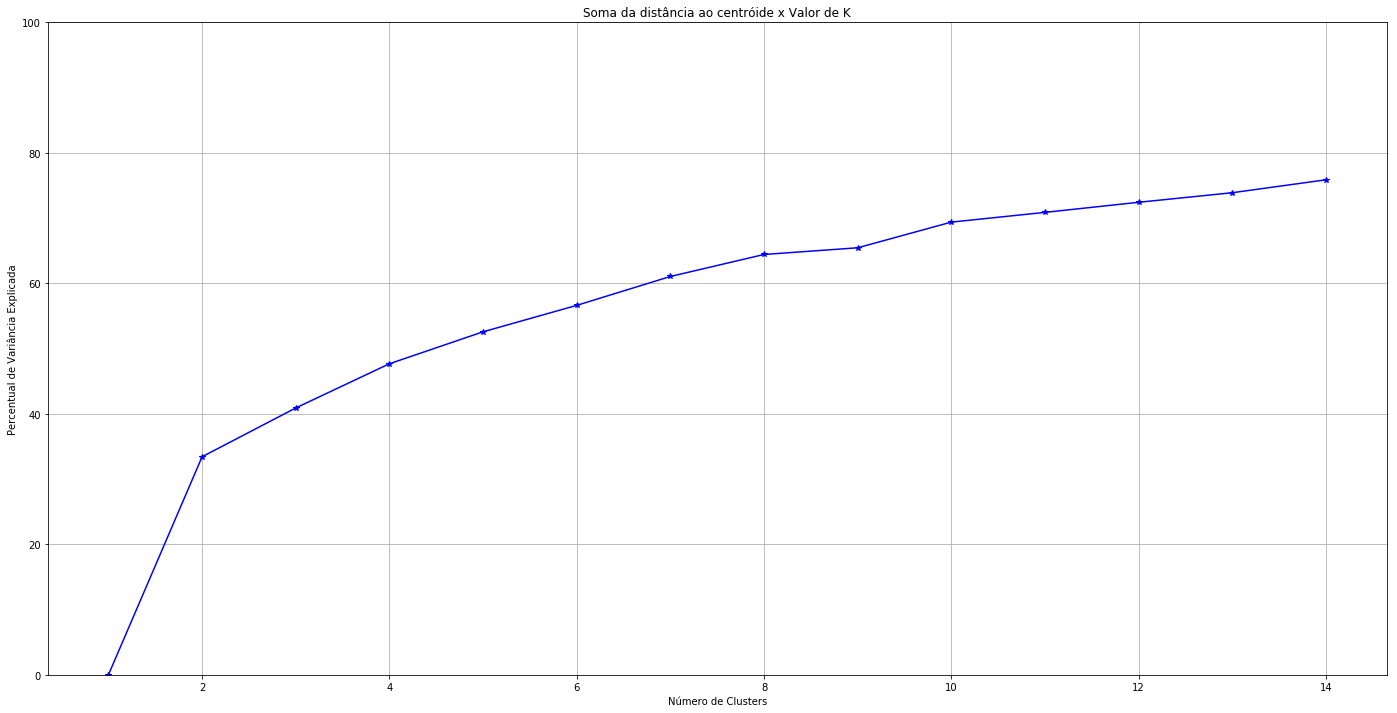

In [115]:
# Determinando um range de K
k_range = range(1, 15)

# Aplicando o modelo K-Means a cada valor de K
k_means_var = [KMeans(n_clusters = k).fit(df_reduced) for k in k_range]

# Ajustando o centróide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]

# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(df_reduced, cent, 'euclidean') for cent in centroids]

dist = [np.min(ke, axis=1) for ke in k_euclid]

# Soma dos quadrados das distâncias dentro do cluster
wcss = [sum(d**2) for d in dist]

# Soma total dos quadrados
tss = sum(pdist(df_reduced)**2) / df_reduced.shape[0]

# Soma dos quadrados entre clusters
bss = tss - wcss

# Curva de Elbow
fig = plt.figure(figsize=(24, 12))

ax = fig.add_subplot(111)

ax.plot(k_range, bss / tss * 100, 'b*-')

ax.set_ylim((0, 100))

plt.grid(True)

plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')

plt.title('Soma da distância ao centróide x Valor de K')

**Análise:**
- Observando o gráfico acima, tudo indica que o número ideal de clusters são apenas 2.

In [124]:
n_clusters = 2

cluster_1 = KMeans(n_clusters=n_clusters)
cluster_1.fit(df_reduced)

labels = cluster_1.labels_

print('Silhouette: %.2f' % silhouette_score(df_reduced, labels, metric = 'euclidean'))

Silhouette: 0.30


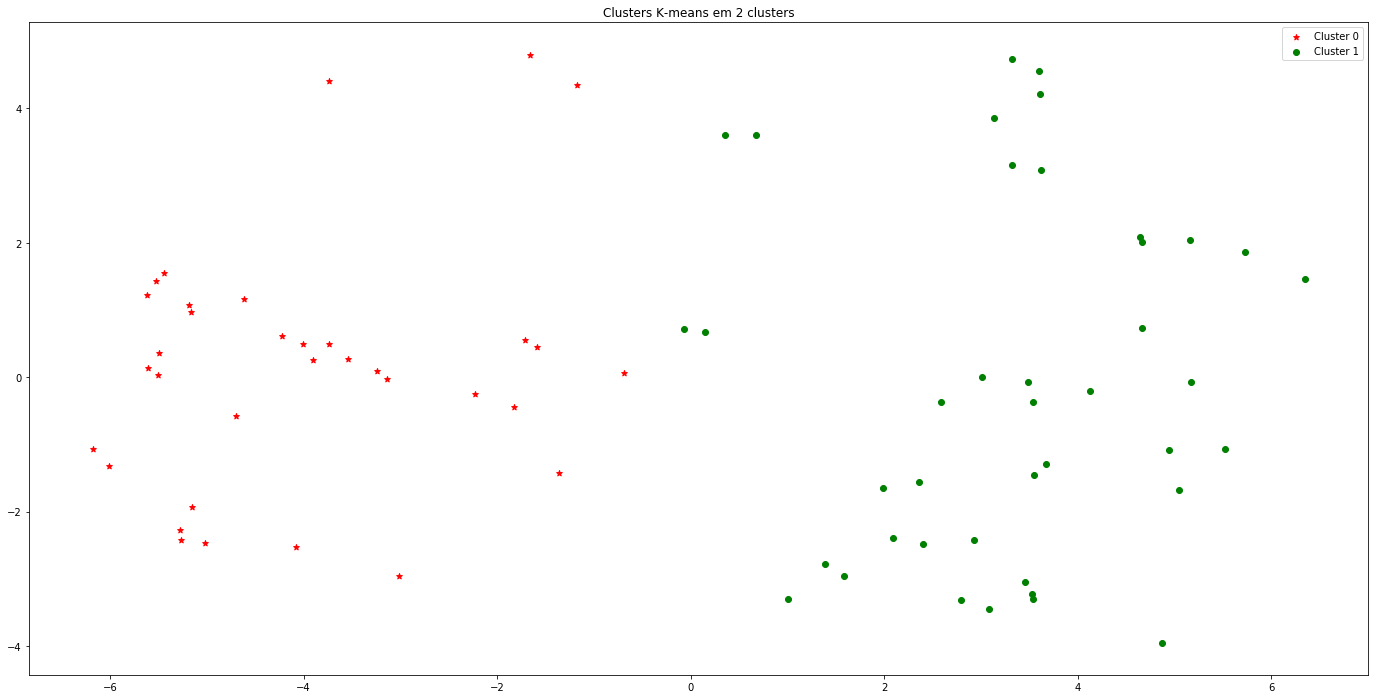

In [126]:
plt.figure(figsize=(24, 12))

for i in range(0, df_reduced.shape[0]):
    if cluster_1.labels_[i] == 1:
        c1 = plt.scatter(df_reduced[i, 0], df_reduced[i, 1], c='r', marker='*')
    elif cluster_1.labels_[i] == 0:
        c2 = plt.scatter(df_reduced[i, 0], df_reduced[i, 1], c='g', marker='o')

        plt.legend([c1, c2], ['Cluster 0', 'Cluster 1'])
        plt.title('Clusters K-means em %d clusters' % n_clusters)

plt.show()

**Análises:**
- Observando o gráfico acima, um dos primeiros pontos que pode-se analisar é o fato de cada ponto estar disperso um dos outros. Com isso os clusters não ficam tão bem aglumerados, e sim mais espalhados.
- Com essa dispersão, ao avaliar-lo pode-se obter um score baixo, devido aos diversos pontos que encontram-se muito perto dos pontos do outro cluster.

# <a id="5">5. Avaliação</a>

In [ ]:
import matplotlib.cm as cm

X = df_reduced

range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10

    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)

        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
        
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

**Análise:**
- Assim como observado em outros gráficos, este nos indica que o melhor número de clusters que obtém uma melhor adesão em nosso modelo é o número 2.
- O modelo com outros números de cluster não se adequam bem ao modelo, pois possuem valores negativos e também pouca quantidade de dados.